# 🚢 Titanic Dataset: Correlation Analysis
Let's explore relationships between variables in the cleaned Titanic dataset. Correlation analysis helps us understand which factors were most strongly associated with survival.

In [ ]:
# 📊 Day 6: Correlation Analysis
# Author: David Caleb Chaparro Orozco
# Topic: Exploring Correlation Between Features using Titanic Dataset

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Set visual style
sns.set(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (12, 8)

In [ ]:
# Load the dataset
data = pd.read_csv("data/titanic_cleaned.csv")
data.head()

In [ ]:
data.info()

In [ ]:
# Create age groups for better analysis
bins = [0, 12, 18, 30, 50, 100]
labels = ['child', 'teen', 'young_adult', 'adult', 'senior']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

In [ ]:
data.head()

## 1. Numeric Variables Correlation

In [ ]:
numeric_data = data.select_dtypes(include='number')
numeric_data.head()

In [ ]:
# Calculate correlation matrix
corr_matrix = numeric_data.corr(method="pearson")

# Visualize with heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".3f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### Observations:
1. Strongest positive correlation with survival: Fare (0.25)
   - Higher fare passengers more likely to survive
2. Strongest negative correlation: Pclass (-0.33)
   - Lower class (higher pclass number) less likely to survive
3. Age shows weak negative correlation (-0.08)
   - Younger passengers slightly more likely to survive
4. Family size (sibsp + parch) shows minimal correlation

## 2. Categorical Variables Analysis

In [ ]:
categorical_cols = data.select_dtypes(include='object')
categorical_cols.head()

In [ ]:
# Create plots for each categorical feature
for col in categorical_cols:
    plt.figure()
    sns.barplot(x=col, y='survived', data=data, errorbar=None, palette='pastel')
    plt.title(f"Survival Rate by {col}")
    plt.ylabel("Survival Rate")
    plt.xticks(rotation=45)
    plt.show()

### Observations:
1. Sex: Females had ~76% survival vs ~24% for males
2. Embarked: Cherbourg passengers had highest survival (~58%)
3. Who: Children had highest survival rate (59%)
4. Age Group: Children had 59% survival vs 36% for seniors

## 3. Combined Factor Analysis

In [ ]:
# Survival by class and sex
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=data, errorbar=None)
plt.title("Survival Rates by Class and Sex")
plt.ylabel("Survival Rate")
plt.xlabel("Passenger Class")
plt.show()

In [ ]:
# Survival by age group and class
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='survived', hue='pclass', data=data, errorbar=None)
plt.title("Survival Rates by Age Group and Class")
plt.ylabel("Survival Rate")
plt.xlabel("Age Group")
plt.show()

## 4. Advanced Correlation: Cramer's V (for categorical-categorical)

In [ ]:
# Calculate Cramér's V statistic for categorical-categorical association
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    try:
        chi2 = stats.chi2_contingency(confusion_matrix)[0]  
        n = confusion_matrix.sum().sum()
        phi2 = chi2/n
        r, k = confusion_matrix.shape
        return np.sqrt(phi2 / min((k-1), (r-1)))
    except:
        # Return 0 if calculation fails
        return 0  

In [ ]:
# Calculate for important categorical features
cat_cols = ['sex', 'pclass', 'embarked', 'who', 'alone']
cramers_results = pd.DataFrame(index=cat_cols, columns=cat_cols)

In [ ]:
for col1 in cat_cols:
    for col2 in cat_cols:
        cramers_results.loc[col1, col2] = cramers_v(data[col1], data[col2])

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_results.astype(float), annot=True, cmap="Blues", fmt=".3f")
plt.title("Cramér's V Correlation Between Categorical Variables")
plt.show()

### Observations:
- -1 to 1 scale (negative/positive association)
- 0 = no correlation, ±0.3 = weak, ±0.5 = moderate, ±0.7+ = strong


### Cramér's V Interpretation (0-1 scale):
1. sex vs pclass: 0.13 (weak)
2. pclass vs embarked: 0.17 (weak)
3. sex vs alone: 0.27 (weak)
4. who vs alone: 0.44 (moderate)
5. who vs sex: 0.94 (strong)


---
# Testing correlation_utils.py
---

Plot saved to outputs\numeric_correlation.png


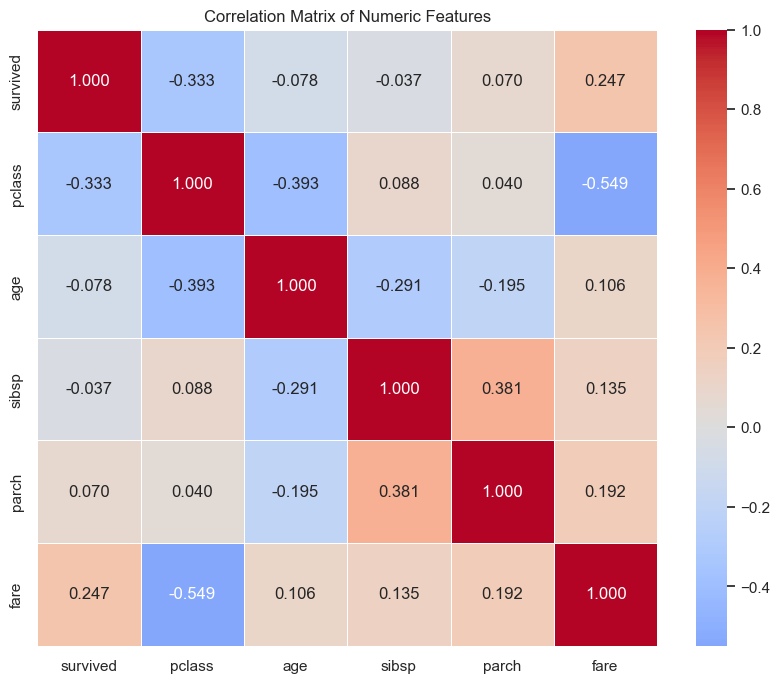

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_sex.png


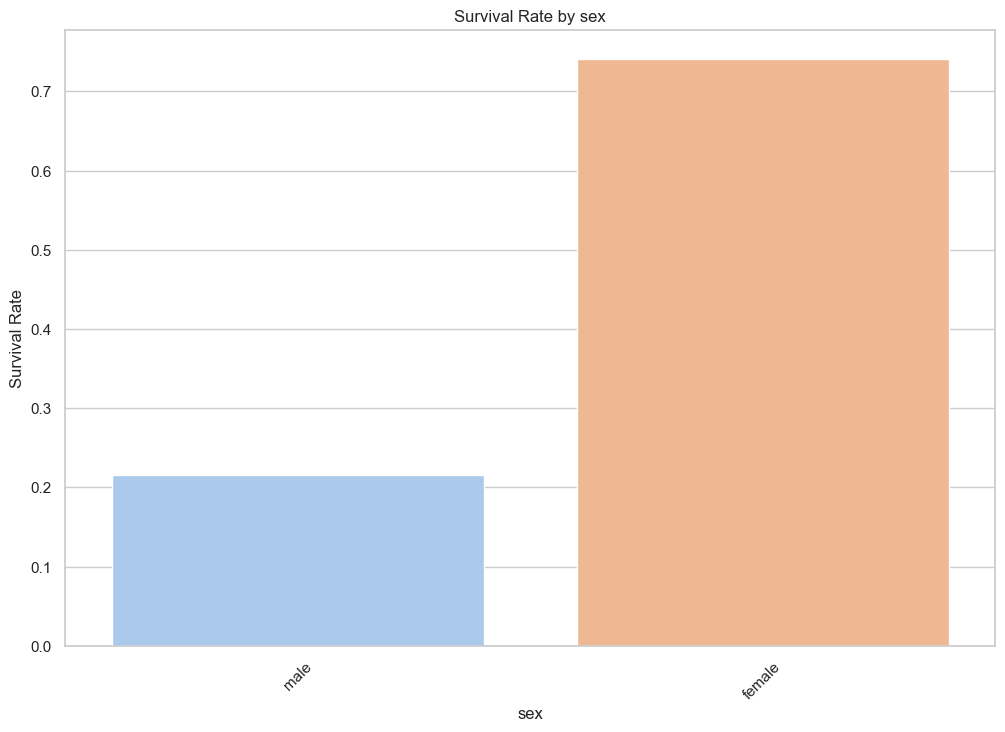

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_embarked.png


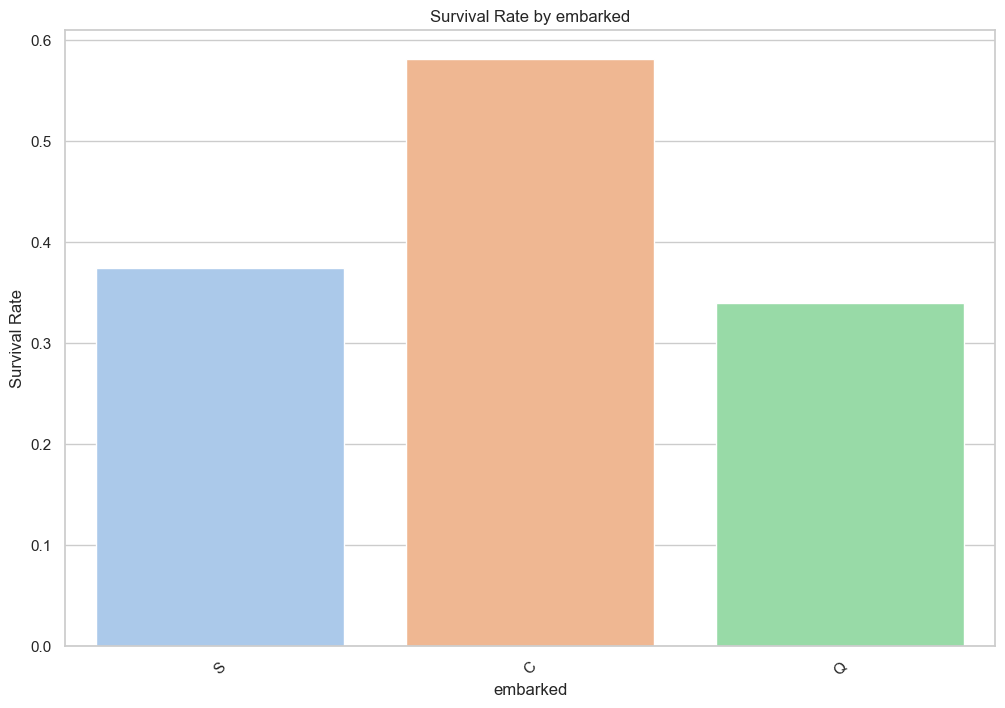

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_class.png


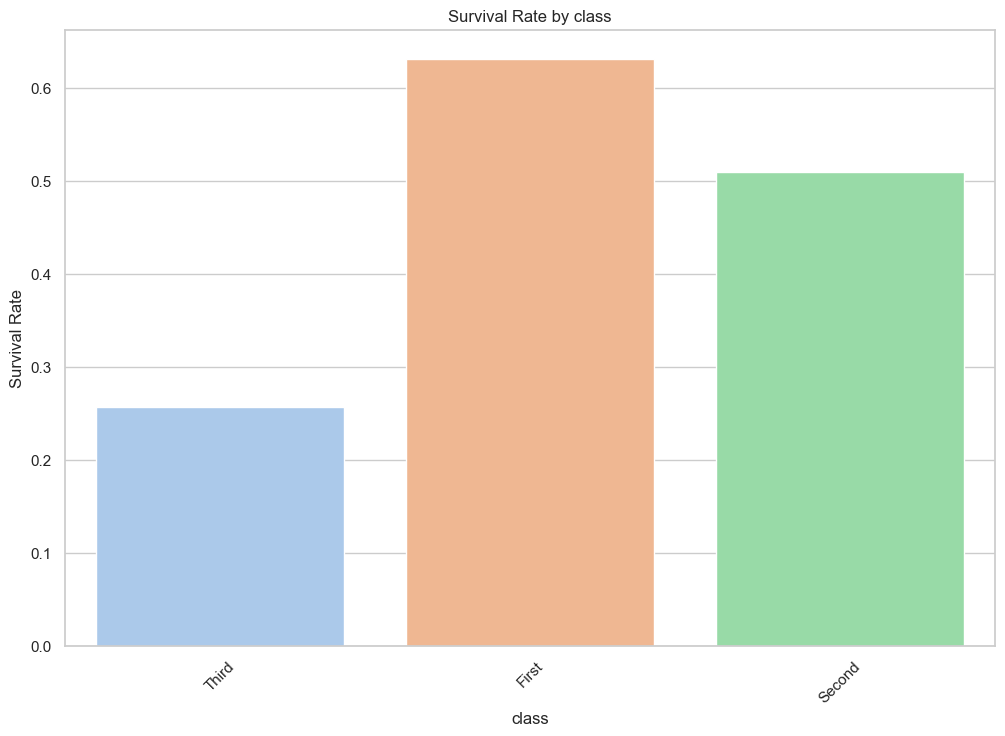

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_who.png


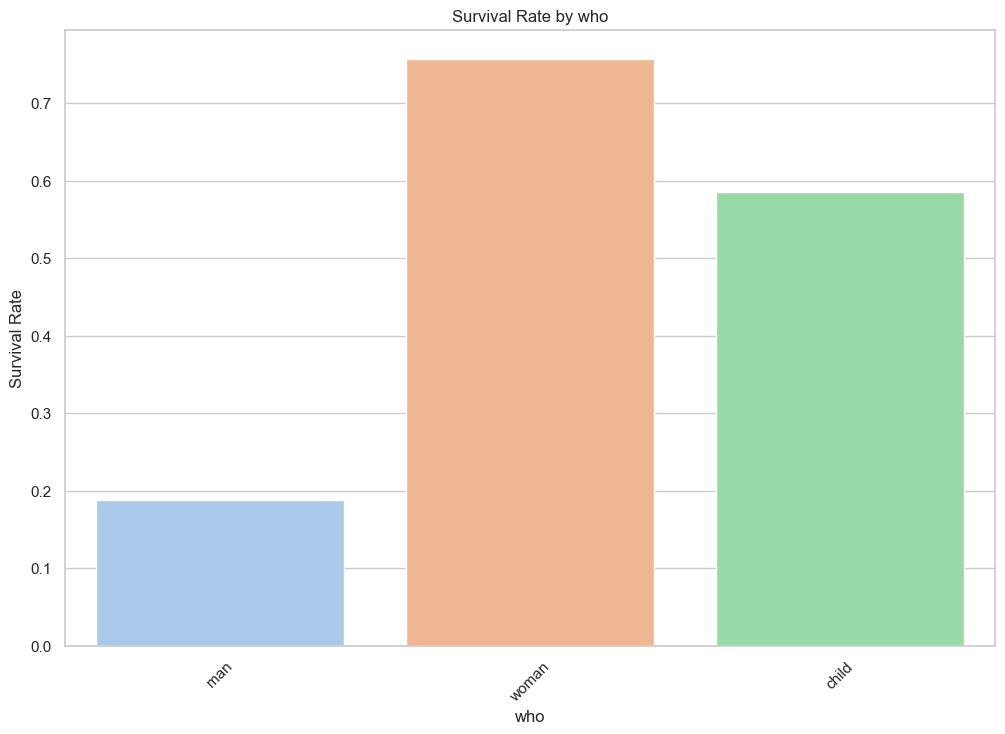

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_embark_town.png


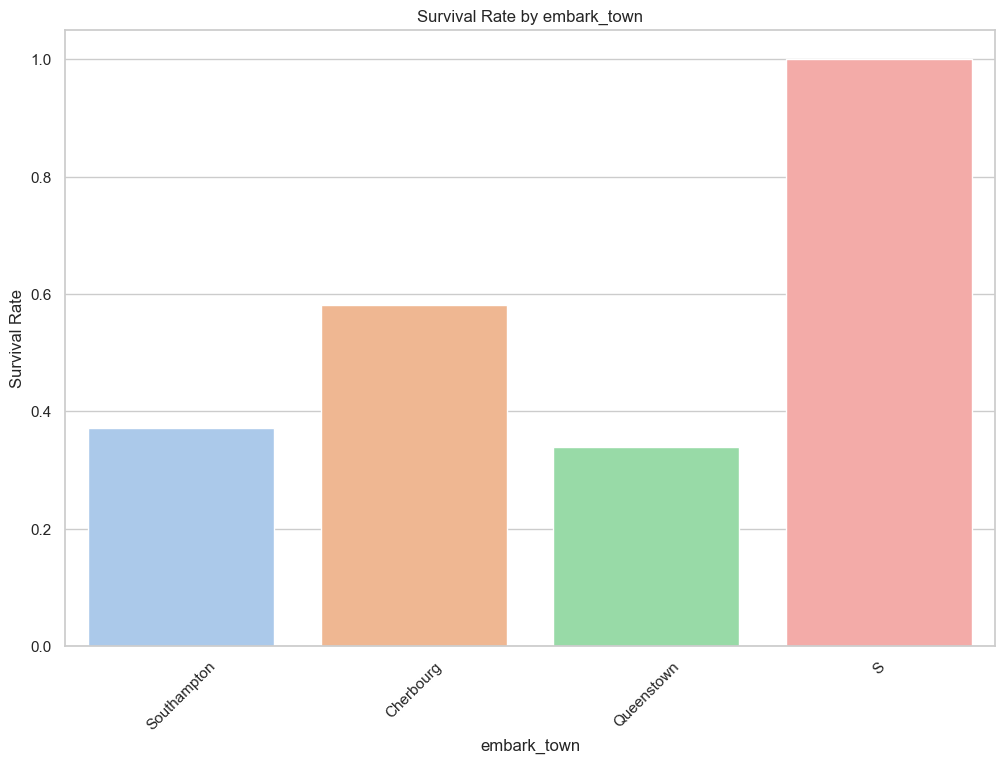

c:\Users\Usuario\Desktop\100DaysofDataMastery\Day06_Correlation_Titanic\correlation_utils.py:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_var, data=data,


Plot saved to outputs\survival_by_alive.png


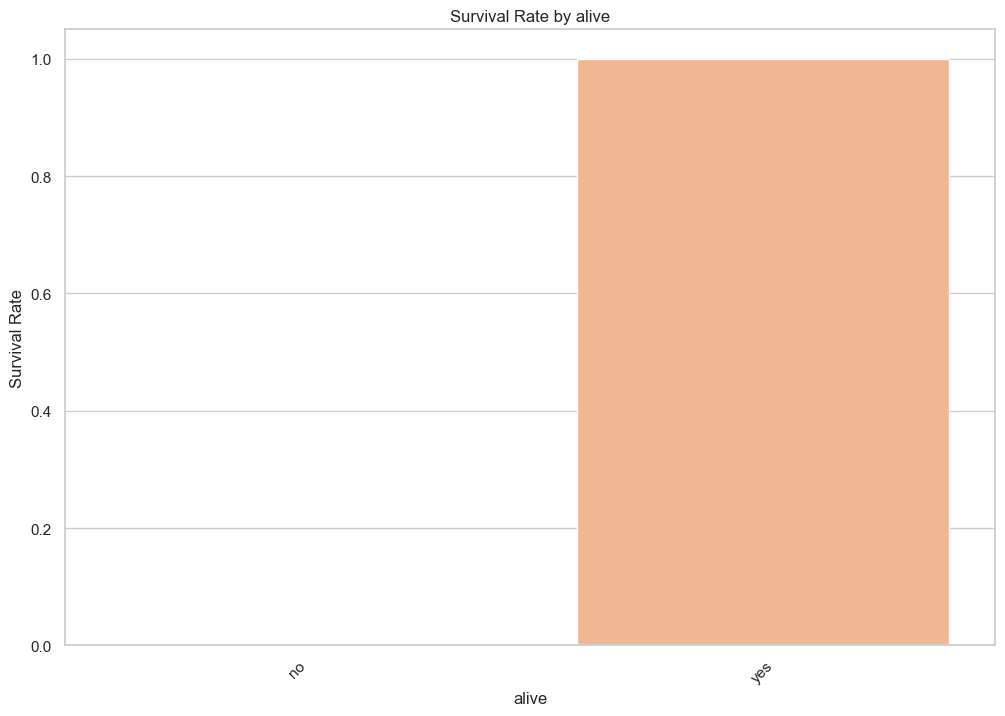

Plot saved to outputs\combined_pclass_by_sex.png


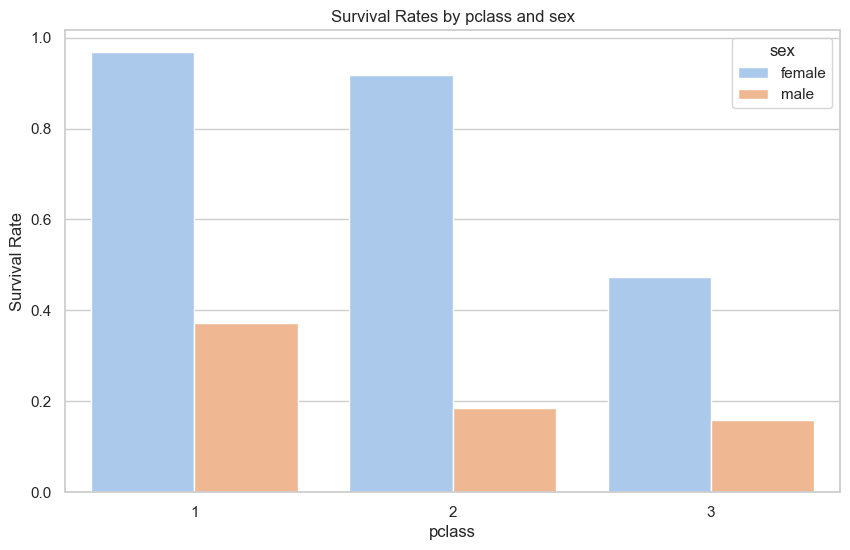

Plot saved to outputs\cramers_v_matrix.png


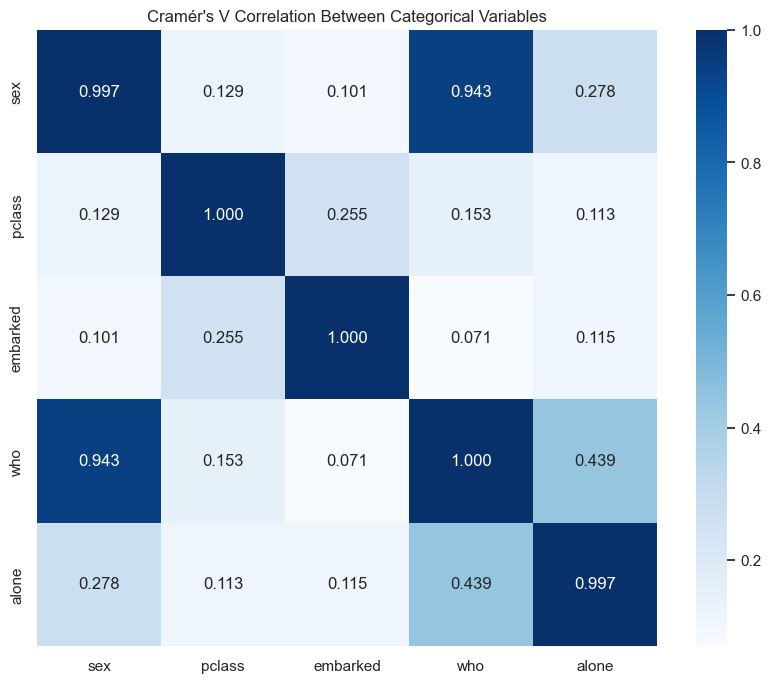

,sex,pclass,embarked,who,alone
sex,0.997275,0.128633,0.101096,0.942523,0.277798
pclass,0.128633,1.0,0.254914,0.152798,0.112956
embarked,0.101096,0.254914,1.0,0.070979,0.115399
who,0.942523,0.152798,0.070979,1.0,0.438566
alone,0.277798,0.112956,0.115399,0.438566,0.9974


In [1]:
from correlation_utils import *

# Configure visual settings
configure_visuals()

# Load your data
data = pd.read_csv("data/titanic_cleaned.csv")

# 1. Numeric correlation
plot_numeric_correlation(data)

# 2. Categorical survival rates
plot_categorical_survival(data)

# 3. Combined factor analysis
plot_combined_factors(data, x_var='pclass', hue_var='sex')

# 4. Cramér's V analysis
plot_cramers_v_matrix(data, cat_cols=['sex', 'pclass', 'embarked', 'who', 'alone'])